In [1]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [2]:
#load data
data = pd.read_csv("..\..\Data\Day\S&P 500 Historical Data00-20.csv")

In [3]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/14/2019,"3,096.63","3,090.75","3,098.20","3,083.26",NaN,0.08%
1,11/13/2019,"3,094.04","3,084.18","3,098.06","3,078.80",NaN,0.07%
2,11/12/2019,"3,091.84","3,089.28","3,102.61","3,084.73",NaN,0.16%
3,11/11/2019,"3,087.01","3,080.33","3,088.33","3,075.82",NaN,-0.20%
4,11/08/2019,"3,093.08","3,081.25","3,093.09","3,073.58",NaN,0.26%


In [4]:
data['Timestamp'] = pd.DataFrame(data.Date)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.Price = data.Price.str.replace(',', '').astype(float) # Here price is equal to close
data.High = data.High.str.replace(',', '').astype(float)
data.Low = data.Low.str.replace(',', '').astype(float)
data.Open = data.Open.str.replace(',', '').astype(float)
data = data.drop("Vol.", axis = 1)

In [5]:
special_data = pd.DataFrame(data)

In [6]:
special_data = data[(data['Date'] > '2013-01-01') & (data['Date'] < '2015-01-01')]
special_data.index = data.index[:len(special_data)]

In [7]:
#change indexes
special_data.set_index('Date', inplace = True)

In [8]:
data.head(10)

,Date,Price,Open,High,Low,Change %,Timestamp
4999,2000-01-03,1455.2,1469.2,1478.0,1438.4,-0.95%,01/03/2000
4998,2000-01-04,1399.4,1455.2,1455.2,1397.4,-3.83%,01/04/2000
4997,2000-01-05,1402.1,1399.4,1413.3,1377.7,0.19%,01/05/2000
4996,2000-01-06,1403.5,1402.1,1411.9,1392.0,0.10%,01/06/2000
4995,2000-01-07,1441.5,1403.5,1441.5,1400.5,2.71%,01/07/2000
4994,2000-01-10,1457.6,1441.5,1464.4,1441.5,1.12%,01/10/2000
4993,2000-01-11,1438.6,1457.6,1458.8,1434.4,-1.30%,01/11/2000
4992,2000-01-12,1432.2,1439.1,1445.3,1427.3,-0.44%,01/12/2000
4991,2000-01-13,1449.7,1432.2,1454.6,1432.2,1.22%,01/13/2000
4990,2000-01-14,1465.2,1449.7,1473.0,1449.7,1.07%,01/14/2000


In [9]:
special_data.head(10)

,Price,Open,High,Low,Change %,Timestamp
Date,,,,,,
2013-01-02,1462.42,1426.19,1462.43,1426.19,2.54%,01/02/2013
2013-01-03,1459.37,1462.42,1465.47,1455.53,-0.21%,01/03/2013
2013-01-04,1466.47,1459.37,1467.94,1458.99,0.49%,01/04/2013
2013-01-07,1461.89,1466.47,1466.47,1456.62,-0.31%,01/07/2013
2013-01-08,1457.15,1461.89,1461.89,1451.64,-0.32%,01/08/2013
2013-01-09,1461.02,1457.15,1464.73,1457.15,0.27%,01/09/2013
2013-01-10,1472.12,1464.64,1472.30,1461.02,0.76%,01/10/2013
2013-01-11,1472.05,1472.12,1472.75,1467.58,0.00%,01/11/2013
2013-01-14,1470.68,1472.05,1472.05,1465.69,-0.09%,01/14/2013


In [10]:
special_data['new_index'] = special_data.Price
special_data['new_date'] = special_data.Price
special_data.head()

,Price,Open,High,Low,Change %,Timestamp,new_index,new_date
Date,,,,,,,,
2013-01-02,1462.42,1426.19,1462.43,1426.19,2.54%,01/02/2013,1462.42,1462.42
2013-01-03,1459.37,1462.42,1465.47,1455.53,-0.21%,01/03/2013,1459.37,1459.37
2013-01-04,1466.47,1459.37,1467.94,1458.99,0.49%,01/04/2013,1466.47,1466.47
2013-01-07,1461.89,1466.47,1466.47,1456.62,-0.31%,01/07/2013,1461.89,1461.89
2013-01-08,1457.15,1461.89,1461.89,1451.64,-0.32%,01/08/2013,1457.15,1457.15


In [11]:
import datetime

special_data.new_index[0] = 1357041600
special_data.new_date[0] = datetime.datetime.fromtimestamp(special_data.new_index[0]).strftime('%Y-%m-%d %H:%M:%S')
for i in range(len(special_data.new_index)):
    if i > 0:
        special_data.new_index[i] = special_data.new_index[i - 1] + 86400
        special_data.new_date[i] = datetime.datetime.fromtimestamp(special_data.new_index[i]).strftime('%Y-%m-%d %H:%M:%S')

In [12]:
#change indexes
date_array = special_data['new_date']
special_data.set_index('new_date', inplace = True)

In [13]:
special_data.head(20)

,Price,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2013-01-01 19:00:00,1462.42,1426.19,1462.43,1426.19,2.54%,01/02/2013,1.357042e+09
2013-01-02 19:00:00,1459.37,1462.42,1465.47,1455.53,-0.21%,01/03/2013,1.357128e+09
2013-01-03 19:00:00,1466.47,1459.37,1467.94,1458.99,0.49%,01/04/2013,1.357214e+09
2013-01-04 19:00:00,1461.89,1466.47,1466.47,1456.62,-0.31%,01/07/2013,1.357301e+09
2013-01-05 19:00:00,1457.15,1461.89,1461.89,1451.64,-0.32%,01/08/2013,1.357387e+09
2013-01-06 19:00:00,1461.02,1457.15,1464.73,1457.15,0.27%,01/09/2013,1.357474e+09
2013-01-07 19:00:00,1472.12,1464.64,1472.30,1461.02,0.76%,01/10/2013,1.357560e+09
2013-01-08 19:00:00,1472.05,1472.12,1472.75,1467.58,0.00%,01/11/2013,1.357646e+09
2013-01-09 19:00:00,1470.68,1472.05,1472.05,1465.69,-0.09%,01/14/2013,1.357733e+09


In [14]:
special_data.rename(columns={'Price': 'Close'}, inplace=True)

In [15]:
f = Forecaster(y=special_data['Close'], current_dates = special_data.index)

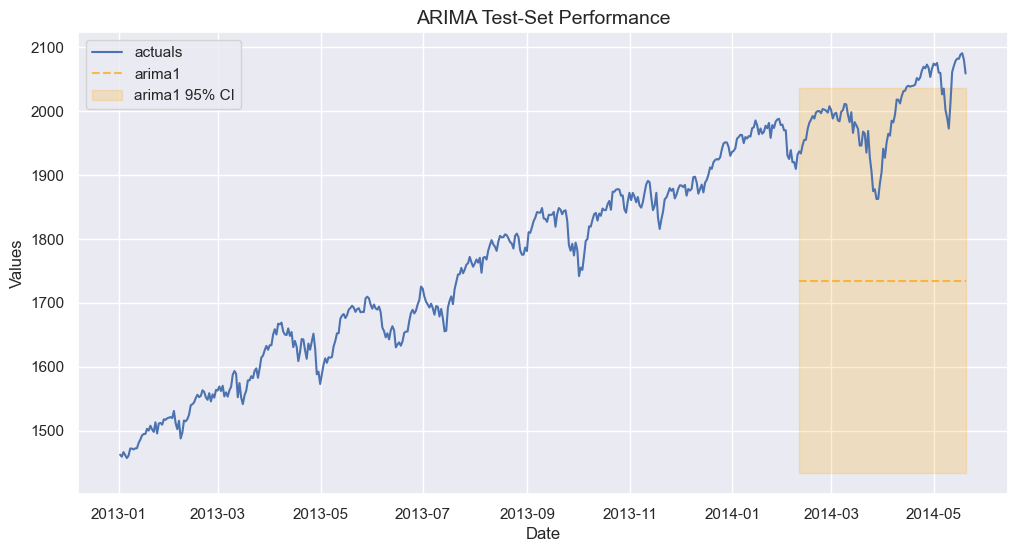

In [16]:
f.generate_future_dates(100) # 12-month forecast horizon
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

f.plot_test_set(ci=True) # view test results
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

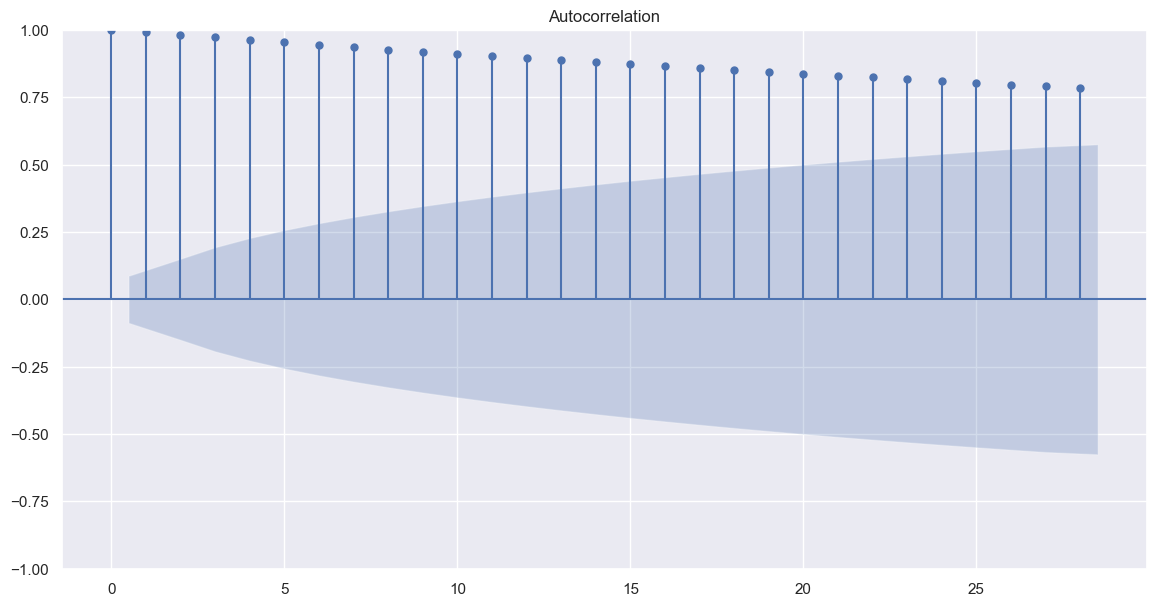

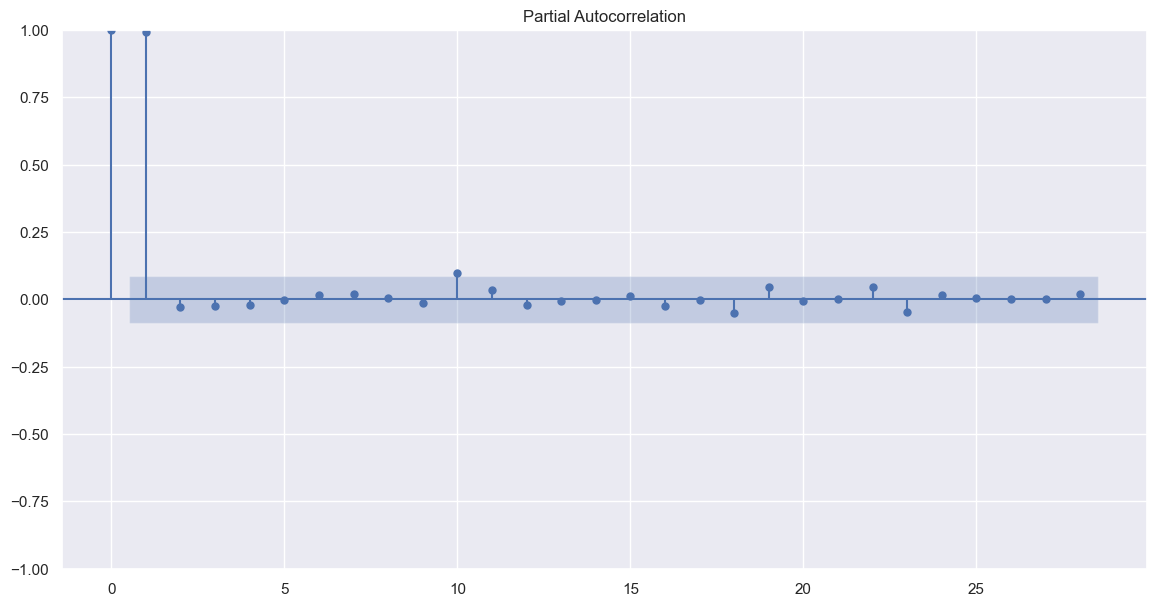

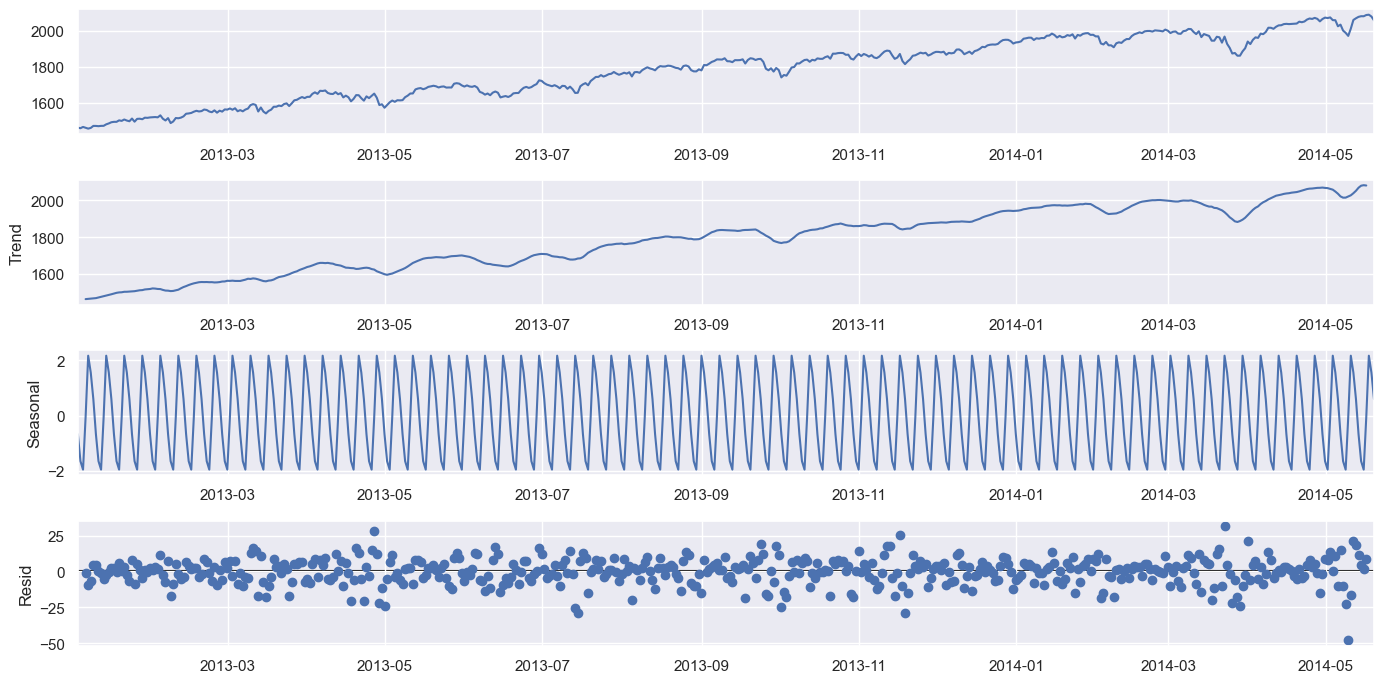

-1.1658078938229492
0.6881287092511765


In [17]:
# EDA
f.plot_acf()
plt.show()
f.plot_pacf()
plt.show()
f.seasonal_decompose().plot()
plt.show()
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

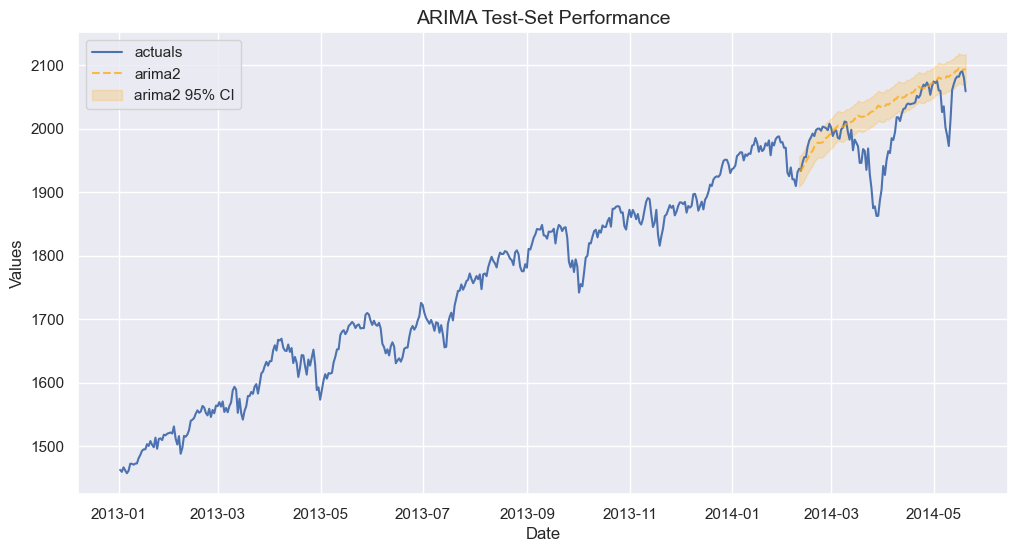

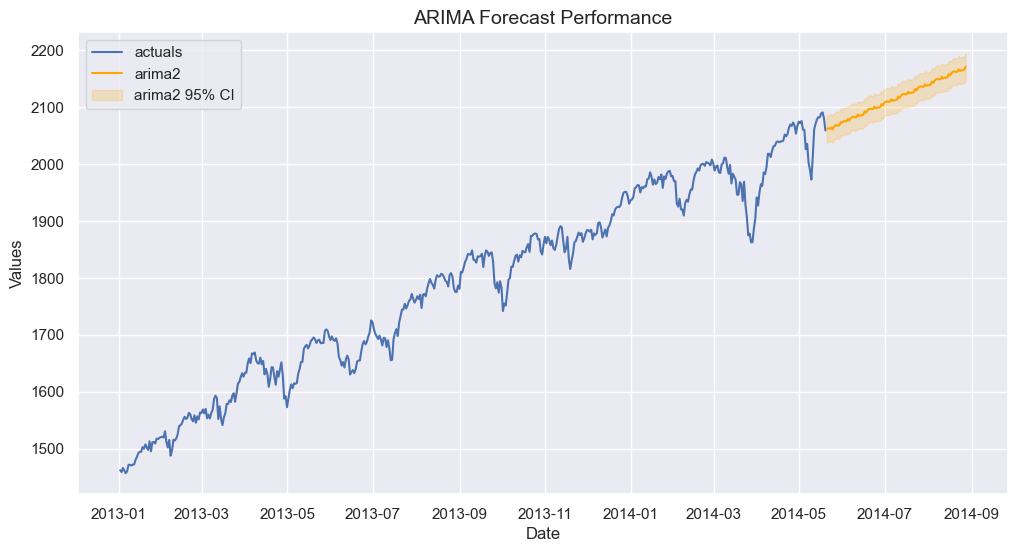

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  504
Model:             ARIMA(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -1959.985
Date:                          Sun, 22 Oct 2023   AIC                           3933.971
Time:                                  11:07:36   BIC                           3963.346
Sample:                                       0   HQIC                          3945.507
                                          - 504                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6597     45.947      0.014      0.989     -89.394      90.714
ar.L2          0.0211      1.363      0.015      0.988      -2.651       2.693
ma.L1         -0.6898     45.950     -0.015      0.988     -90.750      89.370
ar.S.L12      -0.0635      0.058     -1.085      0.278      -0.178       0.051
ar.S.L24      -0.0392      0.057     -0.686      0.493      -0.151       0.073
ma.S.L12      -0.9347      0.034    -27.327      0.000      -1.002      -0.868
sigma2       162.5111      8.600     18.897      0.000     145.655     179.367
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.28
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                            -0.38
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Forecast
f.manual_forecast(order=(2,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [20]:
adf_test(special_data['Close'])

1. ADF :  -1.1658078938229492
2. P-Value :  0.6881287092511765
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 503
5. Critical Values :
	 1% :  -3.4434175660489905
	 5% :  -2.8673031724657454
	 10% :  -2.5698395516760275


In [21]:
stepwise_fit = auto_arima(special_data['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  504
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1983.668
Date:                Sun, 22 Oct 2023   AIC                           3971.337
Time:                        11:07:37   BIC                           3979.778
Sample:                    01-01-2013   HQIC                          3974.648
                         - 05-19-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1858      0.572      2.072      0.038       0.064       2.307
sigma2       155.9402      7.701     20.248      0.000     140.846     171.035
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                58.98
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                            -0.43
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
data_len = len(special_data)

In [23]:
train_len = data_len * 0.7
test_len = data_len - train_len

In [24]:
train_data = special_data.iloc[:int(train_len)]

In [25]:
test_data = special_data.iloc[int(train_len):int(train_len + test_len)]

In [26]:
test_data.Close

new_date
2013-12-19 19:00:00    1909.78
2013-12-20 19:00:00    1920.03
2013-12-21 19:00:00    1923.57
2013-12-22 19:00:00    1924.97
2013-12-23 19:00:00    1924.24
                        ...   
2014-05-15 19:00:00    2081.88
2014-05-16 19:00:00    2088.77
2014-05-17 19:00:00    2090.57
2014-05-18 19:00:00    2080.35
2014-05-19 19:00:00    2058.90
Name: Close, Length: 152, dtype: float64

In [27]:
train_data

,Close,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2013-01-01 19:00:00,1462.42,1426.19,1462.43,1426.19,2.54%,01/02/2013,1.357042e+09
2013-01-02 19:00:00,1459.37,1462.42,1465.47,1455.53,-0.21%,01/03/2013,1.357128e+09
2013-01-03 19:00:00,1466.47,1459.37,1467.94,1458.99,0.49%,01/04/2013,1.357214e+09
2013-01-04 19:00:00,1461.89,1466.47,1466.47,1456.62,-0.31%,01/07/2013,1.357301e+09
2013-01-05 19:00:00,1457.15,1461.89,1461.89,1451.64,-0.32%,01/08/2013,1.357387e+09
...,...,...,...,...,...,...,...
2013-12-14 19:00:00,1872.83,1884.88,1884.88,1868.14,-0.65%,05/20/2014,1.387022e+09
2013-12-15 19:00:00,1888.03,1873.34,1888.80,1873.34,0.81%,05/21/2014,1.387109e+09
2013-12-16 19:00:00,1892.49,1888.19,1896.33,1885.39,0.24%,05/22/2014,1.387195e+09


In [28]:
stepwise_fit = auto_arima(train_data.Close, 
                          seasonal=True, 
                          stepwise=False, suppress_warnings=True, 
                   error_action="ignore", max_order=None, trace=True)           

stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=2733.290, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=2734.245, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=2735.506, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=2737.498, Time=0.08 sec


 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=2738.822, Time=0.11 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=2740.226, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=2734.339, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=2739.503, Time=0.10 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=2740.173, Time=0.23 sec
 ARIMA(1,1,5)(0,0,0)[1] intercept   : AIC=2739.364, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=2735.591, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,1,4)(0,0,0)[1] intercept   : AIC=2742.420, Time=0.22 sec
 ARIMA(2,1,5)(0,0,0)[1] intercept   : AIC=2741.281, Time=0.35 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=2737.590, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  352
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1364.645
Date:                Sun, 22 Oct 2023   AIC                           2733.290
Time:                        11:07:46   BIC                           2741.012
Sample:                    01-01-2013   HQIC                          2736.364
                         - 12-18-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2806      0.670      1.911      0.056      -0.033       2.594
sigma2       139.4741      8.999     15.499      0.000     121.836     157.112
===================================================================================
Ljung-Box (L1) (Q):                   0.96   Jarque-Bera (JB):                38.32
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.60
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

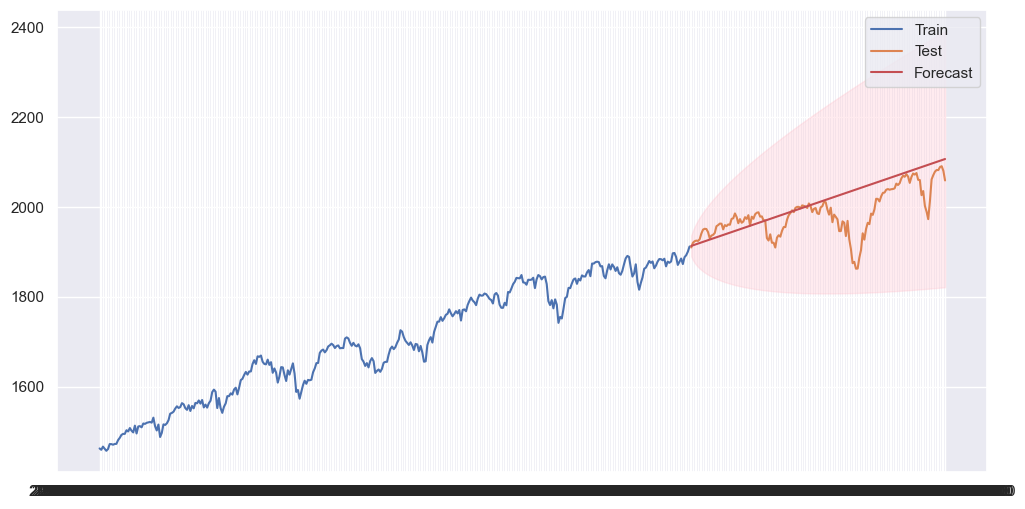

In [29]:
# Обучение модели с найденными оптимальными параметрами
stepwise_fit.fit(train_data.Close)

# Прогнозирование на тестовом наборе данных
forecast, conf_int = stepwise_fit.predict(n_periods=len(test_data), 
                                          return_conf_int=True)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.Close, label='Train')
plt.plot(test_data.index, test_data.Close, label='Test')
plt.plot(test_data.index, forecast, label='Forecast', color='r')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [30]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train_data.Close, order=(2, 1, 2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  352
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1363.596
Date:                Sun, 22 Oct 2023   AIC                           2737.192
Time:                        11:07:48   BIC                           2756.495
Sample:                    01-01-2013   HQIC                          2744.874
                         - 12-18-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4920      0.007   -201.452      0.000      -1.507      -1.477
ar.L2         -0.9977      0.009   -117.052      0.000      -1.014      -0.981
ma.L1          1.4976      0.034     44.078      0.000       1.431       1.564
ma.L2          0.9961      0.047     21.331      0.000       0.905       1.088
sigma2       137.7567     10.234     13.460      0.000     117.698     157.815
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                34.51
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.58
Prob(H) (two-sided):                  0.25   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0, 0.5, 'Price')

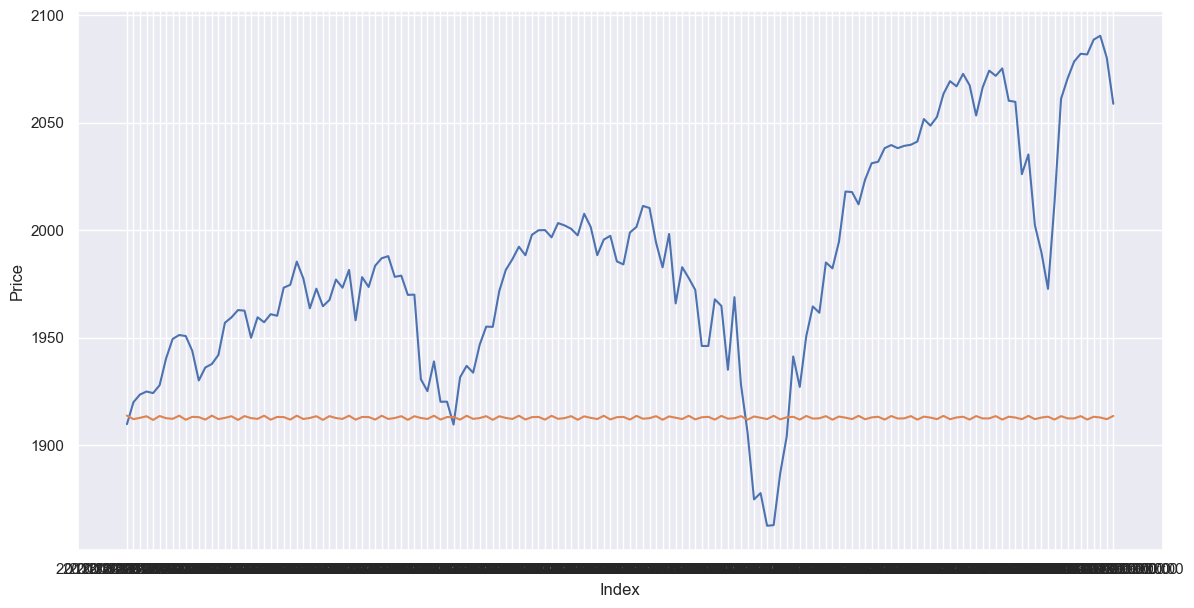

In [31]:
start=test_data.index[0]
end=test_data.index[len(test_data)-1]
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred = model.predict(start = start,end = end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, pred)
plt.xlabel('Index')
plt.ylabel('Price')

In [32]:
pred

2013-12-19 19:00:00    1913.764127
2013-12-20 19:00:00    1912.101285
2013-12-21 19:00:00    1912.732390
2013-12-22 19:00:00    1913.449783
2013-12-23 19:00:00    1911.749794
                          ...     
2014-05-15 19:00:00    1911.929814
2014-05-16 19:00:00    1913.226081
2014-05-17 19:00:00    1912.884275
2014-05-18 19:00:00    1912.100978
2014-05-19 19:00:00    1913.610666
Freq: D, Name: ARIMA predictions, Length: 152, dtype: float64

In [33]:
test = list()
temper = pd.DataFrame(train_data.Close)
for i in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(temper, order=(2, 1, 2))
    model = model.fit()
    start=test_data.index[i]
    end=test_data.index[len(test_data)-1]
    #if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
    #index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
    pred = model.predict(start = start,end = end,typ='levels').rename('ARIMA predictions')
    temper.loc[start] = pred[0]
    test.append(pred[0])

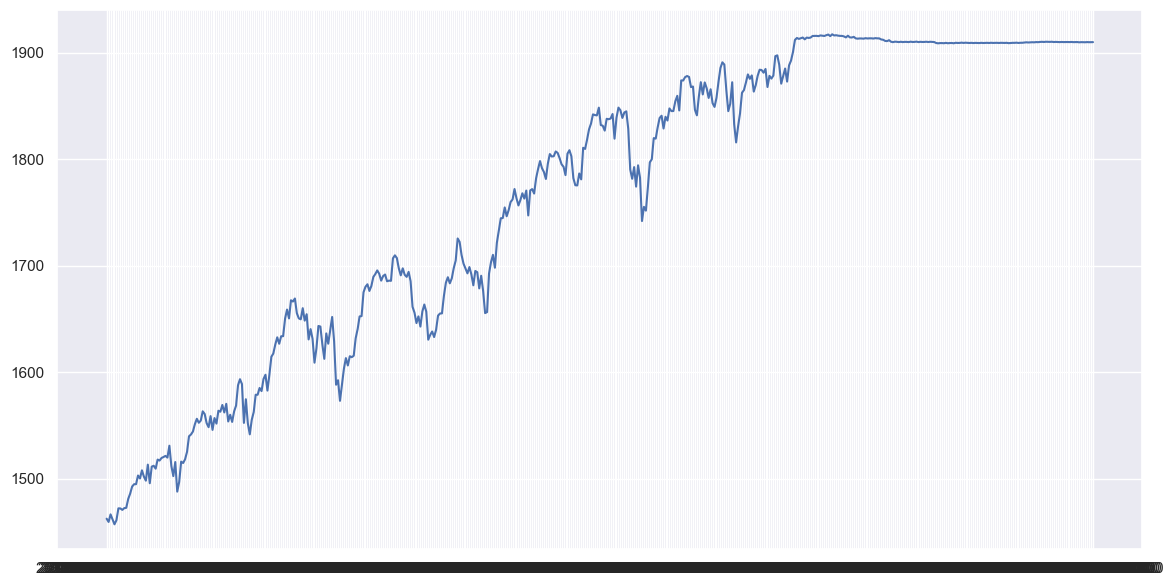

In [34]:
plt.plot(temper)

In [35]:
temper

,Close
new_date,
2013-01-01 19:00:00,1462.420000
2013-01-02 19:00:00,1459.370000
2013-01-03 19:00:00,1466.470000
2013-01-04 19:00:00,1461.890000
2013-01-05 19:00:00,1457.150000
...,...
2014-05-15 19:00:00,1909.741562
2014-05-16 19:00:00,1909.889173
2014-05-17 19:00:00,1909.779908


In [36]:
test

[1913.7641265570014,
 1912.8818783120464,
 1913.489636487348,
 1914.1727316925164,
 1912.482085239826,
 1914.1308282189339,
 1913.7855019821234,
 1914.157201499779,
 1915.6358395300656,
 1915.6463233435413,
 1915.742626858144,
 1915.487134623789,
 1916.1466052984838,
 1915.9089517298498,
 1915.634902372955,
 1916.3691942230037,
 1916.9747707113465,
 1915.4950265932407,
 1917.2046171563493,
 1916.1229876131672,
 1916.3365493620665,
 1915.9588070928598,
 1915.7228557468088,
 1915.7029679069888,
 1915.2330581551296,
 1914.2772948586041,
 1915.8891583666891,
 1914.3184725441922,
 1914.1939848281538,
 1914.8054524527283,
 1913.3683614337021,
 1913.1095122689762,
 1913.3259414961271,
 1913.288009258369,
 1913.1182007629327,
 1913.564398164435,
 1913.3005485996994,
 1913.435234386713,
 1913.4368490739355,
 1913.2230498325673,
 1913.603236948812,
 1913.407767511981,
 1913.358477334256,
 1912.3536566120008,
 1912.0664798198927,
 1910.9939531242417,
 1910.8045002250883,
 1911.6850465213467,
 191

In [37]:
test_data

,Close,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2013-12-19 19:00:00,1909.78,1911.77,1914.46,1907.30,-0.11%,05/28/2014,1.387454e+09
2013-12-20 19:00:00,1920.03,1910.60,1920.03,1909.82,0.54%,05/29/2014,1.387541e+09
2013-12-21 19:00:00,1923.57,1920.33,1924.03,1916.64,0.18%,05/30/2014,1.387627e+09
2013-12-22 19:00:00,1924.97,1923.87,1925.88,1915.98,0.07%,06/02/2014,1.387714e+09
2013-12-23 19:00:00,1924.24,1923.07,1925.07,1918.79,-0.04%,06/03/2014,1.387800e+09
...,...,...,...,...,...,...,...
2014-05-15 19:00:00,2081.88,2083.25,2087.56,2081.86,-0.01%,12/24/2014,1.400155e+09
2014-05-16 19:00:00,2088.77,2084.30,2092.70,2084.30,0.33%,12/26/2014,1.400242e+09
2014-05-17 19:00:00,2090.57,2087.63,2093.55,2085.75,0.09%,12/29/2014,1.400328e+09


Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=3124.922, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3129.132, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3128.326, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3127.927, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3131.112, Time=0.00 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=3126.664, Time=1.71 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(2,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=3131.630, Time=0

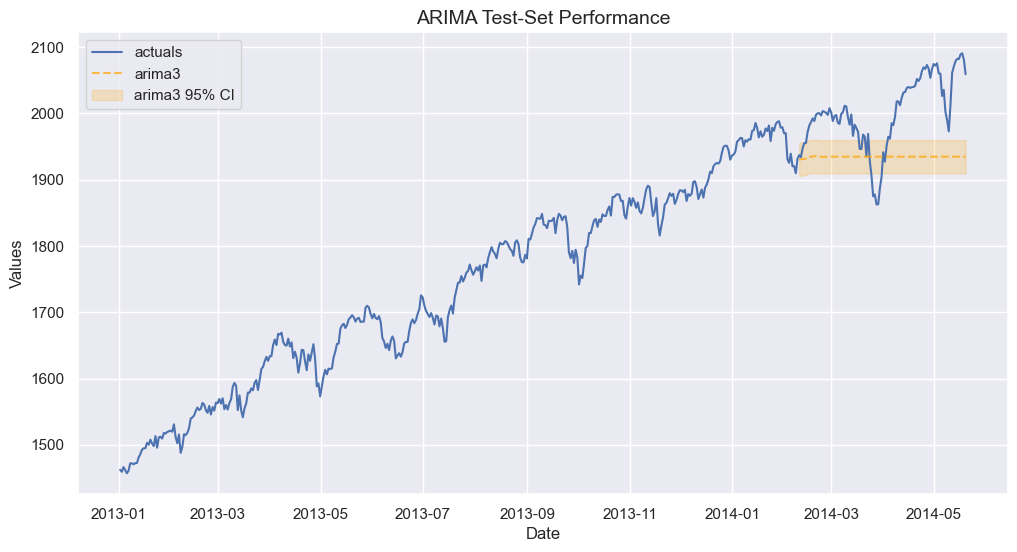

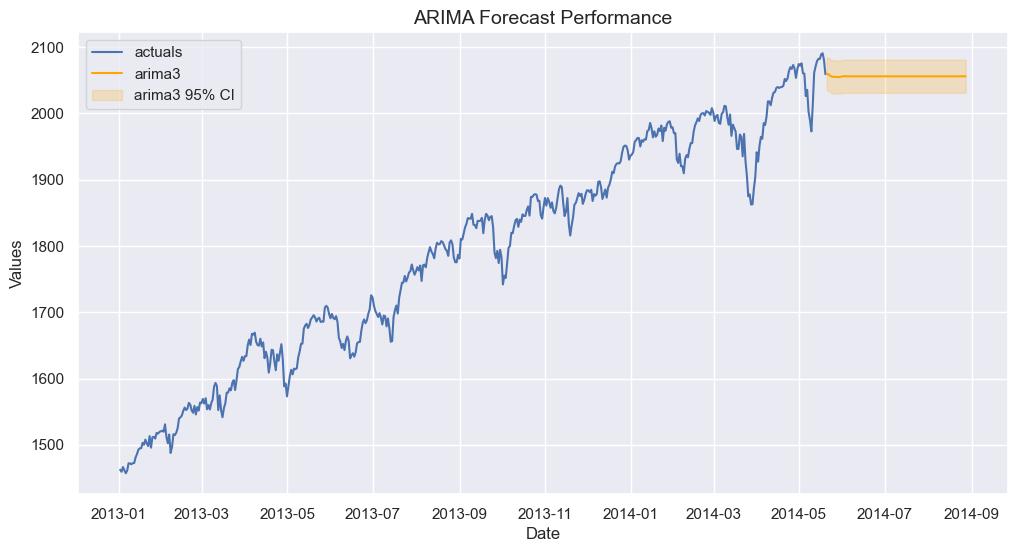

In [38]:
from scalecast.auxmodels import auto_arima

auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2, 
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [39]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  504
Model:             ARIMA(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1984.961
Date:                          Sun, 22 Oct 2023   AIC                           3981.921
Time:                                  11:08:43   BIC                           4007.245
Sample:                                       0   HQIC                          3991.856
                                          - 504                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2502      0.813      0.308      0.758      -1.343       1.843
ar.L2          0.0515      0.037      1.375      0.169      -0.022       0.125
ma.L1         -0.2791      0.809     -0.345      0.730      -1.864       1.306
ar.S.L12       0.0453      1.517      0.030      0.976      -2.928       3.018
ma.S.L12      -0.0797      1.510     -0.053      0.958      -3.039       2.879
sigma2       156.7327      7.861     19.939      0.000     141.326     172.140
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                63.11
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                            -0.41
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

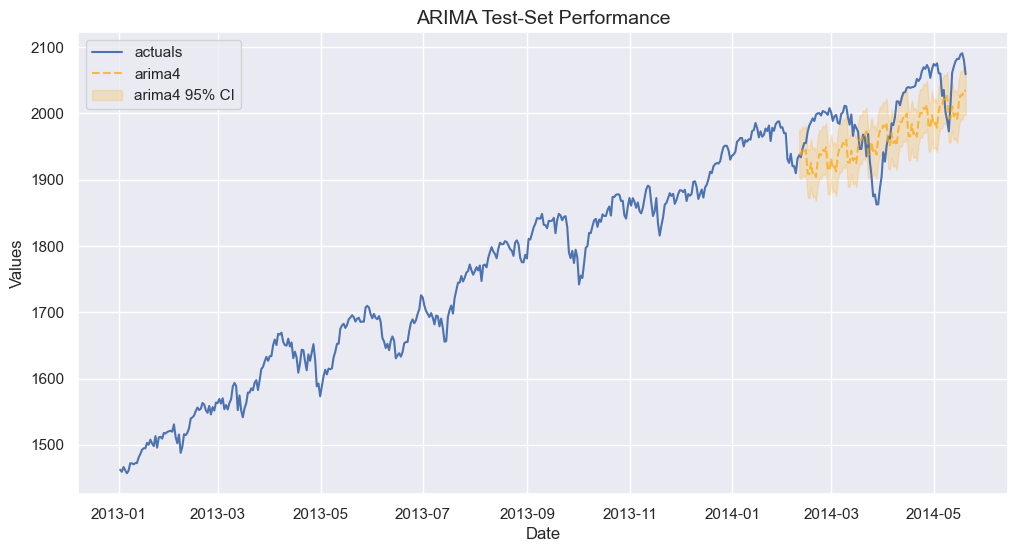

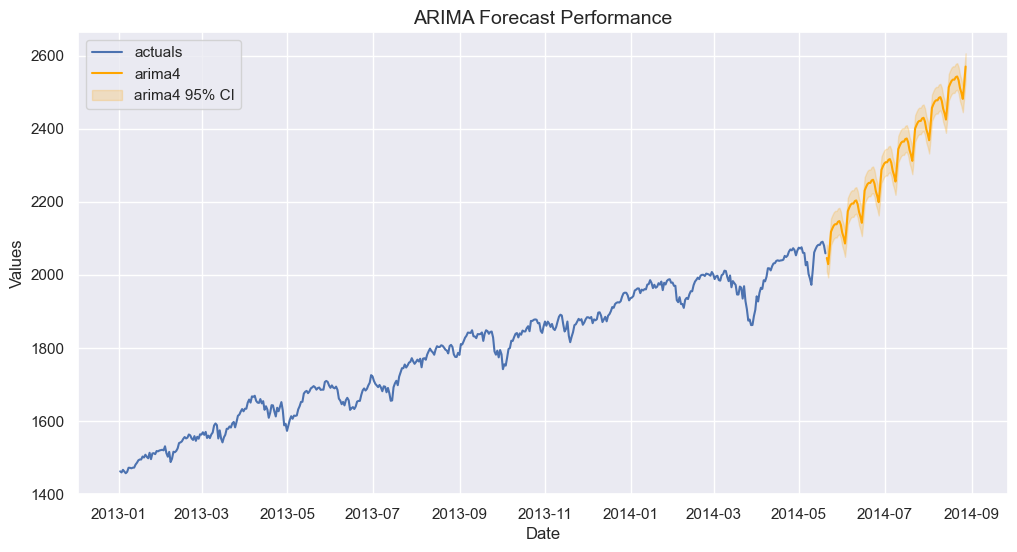

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  504
Model:             ARIMA(1, 1, 1)x(0, 1, [], 12)   Log Likelihood               -2113.362
Date:                           Sun, 22 Oct 2023   AIC                           4232.723
Time:                                   11:08:54   BIC                           4245.313
Sample:                                        0   HQIC                          4237.667
                                           - 504                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1194      9.544     -0.013      0.990     -18.824      18.586
ma.L1          0.1152      9.553      0.012      0.990     -18.609      18.839
sigma2       320.7050     17.800     18.017      0.000     285.817     355.593
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                19.05
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             0.36
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

f.regr.summary()

In [41]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,
                   excel_name='arima_results.xlsx',
                   determine_best_by='TestSetMAPE')

In [42]:
summaries = results['model_summaries']
summaries[
    [
         'ModelNickname',
         'HyperParams',
         'InSampleMAPE',
         'TestSetMAPE'
    ]
]

,ModelNickname,HyperParams,InSampleMAPE,TestSetMAPE
0,arima2,"{'order': (2, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.008419,0.019056
1,arima4,"{'order': (1, 1, 1), 'seasonal_order': (0, 1, 0, 12)}",0.010529,0.025786
2,arima3,"{'order': (2, 1, 1), 'seasonal_order': (1, 0, 1, 12), 'trend': None}",0.007254,0.036655
3,arima1,{},0.083751,0.132439
